# Mid term

You have **80** minutes for this exam.  

Save your exam in the location **mp248/Exams/Midterm.ipynb** on your **GitLab** repository.  You will likely have to create your **Exams** subdirectory.  

Ensure you push your partial work to your repository *early* and *often*.

**Note**: Invigilators will only offer help with **GIT** issues in the final 20 minutes of the exam.  Students that receive help on GIT issues will be deducted **10%** from their exam grade.

* * *

## Problem 1
1. [80% of grade for P1] How much water do you have to store on your 10m high roof-top in order to store enough potential energy, that - if transformed without losses - could run a 50W bulp for 5 hr? Use a package such as `astropy` that provides the capability to calculate with quantities that have units. 
2. [20%] Express your answer as a callable function that takes the power of the light bulp and the duration of how long it should run as well as the hight of the roof top as input. Use the function with the given input values and print the results in the unit kg. 

In [73]:
## Potential energy is mgh PE=mgh
from astropy import units as u
def mass_finder(P,t,h,g=9.8):
    g=9.8*(u.m/u.s/u.s)
    PE=(P)*(t)
    PE=PE.to(u.J)
    m=(PE/(g*h))
    return m.to(u.kg)
h=10*u.m
t=5*u.hr
t=t.to(u.s)
P=50*u.W
mass=mass_finder(P,t,h)
print(mass)

9183.673469387755 kg


* * *

## Problem 2
1. [25%] Make a plot of a square with side length 2 centered at the origin. This means the lower left corner is at the coordinate $(x,y)=(-1,-1)$. Use a solid black line. Add to the plot a circle with radius 1 also centered at the origin. Use a red dashed line.  
2. [25%] Place 100 points inside the square that are randomly distributed in x- and y-direction. Use blue dots.
3. [30%] Determine the fraction of randomly placed points inside the circle. Calculate from this fraction the area of the circle using the known area of the square. Repeat the calculation a couple of times. What is your average answer from 3 calculations?
4. [10%] By how much does this average calculated answer differ from `numpy.pi` in %? 
5. [10%] Is this difference a lack of accuracy or a lack of precision? Explain in one sentence.

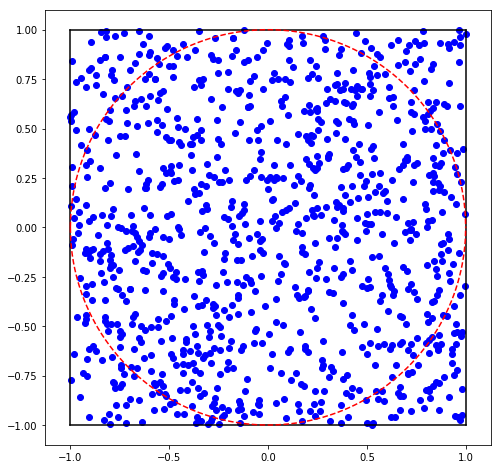

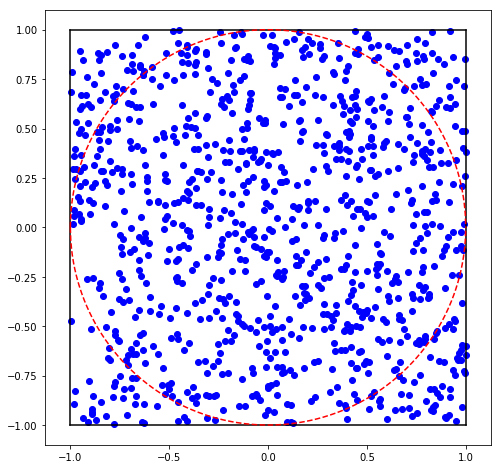

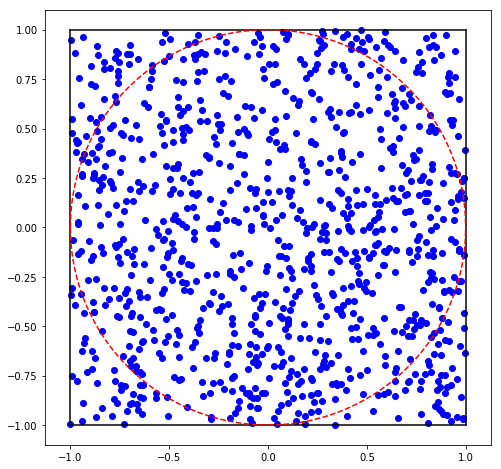

[3.18, 3.188, 3.196]
error percent is 4.64
It is an issue with accuracy. more points would improve the average until round off error takes over


In [31]:
from numpy import pi as pi
import numpy as np
import matplotlib.pyplot as plt
import random as r

pi_li=[]
for _ in range(3):
    x=[]  ;  y=[]
    n=1000
    x=np.random.uniform(-1,1,n)
    y=np.random.uniform(-1,1,n)
    xc=np.linspace(-1,1,n)
    ycp=np.sqrt(1-xc**2)
    ycn=-1*np.sqrt(1-xc**2)
    
    ysv=np.linspace(-1,1,n)   # vertical portion of square
    ysh1=np.linspace(-1,-1,n) # lower horizontal
    ysh2=ysh1+2                # upper horizontal

    xsv1=np.linspace(-1,-1,n)#left vertical
    xsv2=xsv1+2#right vertical
    xsh1=np.linspace(-1,1,n)#
    
    ################
    ### Plotting ###
    ################
    
    plt.figure(figsize=(8,8))
    plt.axis('equal')
    plt.xlim(-1,1)
    inside=0
    for pt in list(zip(x,y)):
        plt.plot(pt[0],pt[1],'bo')
        if pt[0]**2+pt[1]**2 <=1:
            inside+=1
    plt.plot(xsv1,ysv,"k",xsv2,ysv,"k",xsh1,ysh1,"k",xsh1,ysh2,"k")
    plt.plot(xc,ycp,'r--',xc,ycn,'r--')
    plt.show()
    
    
    #####################
    ### Approximating ###
    #####################
    
    
    pi_approx=(inside/n)*4
    pi_li.append(pi_approx)
    
print(pi_li)
avg_pi=sum(pi_li)/len(pi_li)
print("error percent is %.2f" %(abs(avg_pi-pi)*100))

print("It is an issue with accuracy. more points would improve the average until round off error takes over")

* * *

## Problem 3

In this problem we ask you to write a **simple equation solver** function **modsubdiv(f,x,a,b,eps,k)**

The function **modsubdiv** takes as arguments:

* $f$ a Sympy expression, representing a function of $x$, a Sympy variable.  

* $a$ and $b$ are floats. The equation solver will require that $f(a)$ and $f(b)$ have opposite signs.  We call this the **iteration condition**.  The interval $[a,b]$ we call the **considered interval**.

* **eps** will be a threshold where the function **modsubdiv** stops iteration.  This happens when the length of the **considered interval** is less than or equal to **eps**. 

**modsubdiv** will return three numbers: the endpoints of the final considered interval, and the number of iterations required to meet the threshold condition.

For the iteration itself, we ask you to replace the interval $[a,b]$ with a subinterval of $[a,b]$.  Divide the interval $[a,b]$ into $k$ equally spaced subintervals 

$$[a,b] = [a, a+\frac{b-a}{k}] \cup [a+\frac{b-a}{k}, a+2\frac{b-a}{k}] \cup \cdots \cup [a+(k-1)\frac{b-a}{k}, a+k\frac{b-a}{k}=b].$$ 

Choose the first such subinterval that satisfies the iteration condition. Repeat until the considered interval is no longer than **eps**. 

### Part 3.a [60%]
Write the function **modsubdiv**.  

**Hint:** For a simple check on the correctness of your code, compare your **modsubdiv** output with $k=2$ to the output of the **subdiv** function from Assignment 2.

In [205]:
#################### module importing ###########################

import sympy as sp

#################### End module importing #######################

#################### Begin Function Definitions #################
def modsubdiv(f,x,a,b,eps,k):
    '''
    subdiv(f,x,a,b,eps):
    ====================
    Using the subdivision method it finds the roots to a function (within given error).
    
    Input:
    ====================
    f: a sympy function
    x: the variable of interest in f
    a: the left endpoint
    b: the right endpoint
    eps: acceptable error
    k: number of subdivisions
    
    Output:
    ====================
    returns: interval of interest
    '''
    f = sp.lambdify(x,f)
    I=[a,b]
    a=I[0];b=I[-1];
    subintervals=[]
    s=(k-1)
    interval=a+(k-s)*(b-a)/k
    subintervals.append([a,interval])
    sub=[subintervals[-1][-1]]
    s=(k-2)
    for _ in range(k-1):
        interval=a+(k-s)*(b-a)/k
        sub.append(interval)
        subintervals.append([sub[-2],interval])
        s-=1
    try:
        for I in subintervals:
            if f(I[0])<0 and f(I[1])>0:
                I_good=[I[0],I[-1]]
                if I[-1]-I[0]<eps:
                    I_good=[I[0],I[-1]]
        print(I_good)
        return I_good
    except:
        print('Could not find interval')

### Part 3.b [20%]
Compare the number of iterations it takes **modsubdiv** to find the roots of the equation

$$x^2 - 2 = 0$$

with the initial considered interval $[a,b] = [1,2]$ and $eps = \frac{1}{10}, \frac{1}{100}, \frac{1}{1000}, \cdots, \frac{1}{10^6}$, and $k=2, 3, 4, 5$.  Ensure you print the output of **modsubdiv** every time you call it.

In [206]:
def main():
    x=sp.Symbol('x')
    f = (x**2)-2
    a=1;b=2
    k=7
    eps=0.1
    intervals=modsubdiv(f,x,a,b,eps,k)
main()


[1.2857142857142856, 1.4285714285714286]


In [207]:
x=sp.Symbol('x')
f = (x**2)-2
a=1;b=2
for k in range(2,6):
    I=modsubdiv(f,x,a,b,eps,k)
    a=I
    for e in range(1,7):
        eps=1/10**e
        
        

[1, 1.5]
[1, 1.5]
[1, 1.5]
[1, 1.5]
[1, 1.5]
[1, 1.5]
[1.3333333333333333, 1.6666666666666665]
[1.3333333333333333, 1.6666666666666665]
[1.3333333333333333, 1.6666666666666665]
[1.3333333333333333, 1.6666666666666665]
[1.3333333333333333, 1.6666666666666665]
[1.3333333333333333, 1.6666666666666665]
[1.25, 1.5]
[1.25, 1.5]
[1.25, 1.5]
[1.25, 1.5]
[1.25, 1.5]
[1.25, 1.5]
[1.4, 1.6]
[1.4, 1.6]
[1.4, 1.6]
[1.4, 1.6]
[1.4, 1.6]
[1.4, 1.6]


### Part 3.c [20%]
Repeat **Part 3.b** for the equation

$$x^x - 2 = 0$$

with initial considered interval $[a,b]=[1,2]$. 